# Ecuaciones diferenciales de primer orden con 1 variable

- Se desea resolver esta ecuacion
$$ \dfrac{dx}{dt} = f(x,t) $$
- Para resolver la ecuacion de arriba se necesita una condicion inicial ( $ x(t_0) = x_0 $) o condiciones de frontera ( esto no se vera aca ). 

# Metodo de Euler
- Se hace un desarrollo de Euler alrededor de "t"
\begin{align}
    x(t+h) &= x(t) + h \dfrac{dx}{dt} + \dfrac{1}{2}h^2\dfrac{d^2x}{dt^2} \\
           &= x(t) + h \dfrac{dx}{dt} + O(h^2) 
\end{align}
- La aproximación consiste en ignorar los terminos de segundo orden
$$ x(t+h) = x(t) + h \dfrac{dx}{dt} $$ 

- Entonces hacemos el calculo iterativamente desde el punto "t" hasta otro punto "t2" deseado. Y asi por ejemplo podemos usar para calcular la funcion "x" de "t=a" hasta "t=b".  

### Error del Metodo de euler
- En un solo paso hay un error del orden de "$h^2$" por el termino $\dfrac{1}{2}h^2\dfrac{d^2x}{dt^2}$ ignorado
- En muchos pasos desde "t=a" hasta "t=b" con N pasos tenemos un error del orden de "h" en especifico de: 
$$\dfrac{1}{2}h [ f(x(b),b) - f(x(a),a) ]$$

# Metodo de runge de 2do orden 
- El metodo runge-kutta de 2do orden tiene como expresion 
\begin{align}
    x(t+h) &= x(t) + h \left(\dfrac{dx}{dt}\right)_{t+1/2} + O(h^3) \\
           &= x(t) + h f(x(t+1/2h),t+1/2h)) + O(h^2) 
\end{align}
- Que en forma adecuada para codear se puede escribir como: 
\begin{align}
    k_1 &= h f(x,t) \\
    k_2 &= h f(x+1/2\cdot k_1, t+1/2\cdot h) \\
    x(t+h) &= x(t) + k_2 
\end{align}

### Error del Metodo de runge de 2do orden
- El error por paso "h" es del orden de "$h^3$" y error total de "$h^2$"

# Metodo de runge de 4to orden
- Lo escribimos en forma ordenada para codear
\begin{align}
k_1 &= hf(x,t) \\
k_2 &= hf(x+ 1/2\cdot k_1,t+ 1/2\cdot h)\\
k_3 &= hf(x+ 1/2 \cdot k_2,t+1/2 \cdot 1/2 \cdot h) \\
k_4 &= hf(x+1/2 \cdot k3,t+1/2 \cdot h) \\
x(x+h) &= x(t) + \dfrac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4 ) 
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Euler implementación

In [2]:
def euler(f,t0=0,x0=0,limsup=0,n=100):
    '''
    Funcion que recibe como argumentos 
    - f = funcion de R2-> R 
    - t0,x0 = condicion inicial (valor inicial)
    - limsup = hasta donde se quiere hacer la prediccion 
    - n = numero de pasos
    Y restorna un array de dos dimensiones , donde en la primera esta el dominio y la segunda es el rango predicho 
    '''
    h = (limsup-t0)/n
    t = t0
    x = x0
    cal_valores = [] # rango predicho
    valores_t = [] # dominio donde se predice
    cal_valores.append(x)
    valores_t.append(t)
    for k in range(0,n):
        x = x + h*f(t,x)
        t = t + h
        cal_valores.append(x)
        valores_t.append(t)
    
    lista_resultados = np.array([valores_t,cal_valores],dtype=np.float64)
        
    return np.array(lista_resultados)    

# Runge kutta

In [12]:
# implemento runge kuta 3
def RK2(f=None,t0=0,x0=0,limsup=0,n=10):
    '''
    Funcion que recibe como argumentos 
    - f = funcion de R2-> R 
    - t0,x0 = condicion inicial (valor inicial)
    - limsup = hasta donde se quiere hacer la prediccion
    - n = numero de pasos
    Y restorna un array de dos dimensiones , donde en la primera esta el dominio y la segunda es el rango predicho 
    '''
    h = (limsup-t0)/n
    t = t0
    x = x0
    cal_valores = [] # rango predicho
    valores_t = [] # dominio donde se predice
    cal_valores.append(x)
    valores_t.append(t)
    for i in range(0,n):
        k1 = f(t,x)
        k2 = f(t+1/2*h,x+1/2*k1*h)
        x = x + k2
        t = t0 + (i+1)*h
        cal_valores.append(x)
        valores_t.append(t)
    lista_resultados = np.array([valores_t,cal_valores],dtype=np.float64)
    return lista_resultados

# implemento runge kuta 3
def RK3(f=None,t0=0,x0=0,limsup=0,n=10):
    '''
    Funcion que recibe como argumentos 
    - f = funcion de R2-> R 
    - t0,x0 = condicion inicial (valor inicial)
    - limsup = hasta donde se quiere hacer la prediccion
    - n = numero de pasos
    Y restorna un array de dos dimensiones , donde en la primera esta el dominio y la segunda es el rango predicho 
    '''
    h = (limsup-t0)/n
    t = t0
    x = x0
    cal_valores = [] # rango predicho
    valores_t = [] # dominio donde se predice
    cal_valores.append(x)
    valores_t.append(t)
    for i in range(0,n):
        k1 = h*f(t,x)
        k2 = h*f(t+1/2*h,x+1/2*k1)
        k3 = h*f(t+h,x-k1+2*k2)
        x = x + 1/6*(k1+4*k2+k3)
        t = t0 + (i+1)*h
        cal_valores.append(x)
        valores_t.append(t)
    
    lista_resultados = np.array([valores_t,cal_valores],dtype=np.float64)
    return lista_resultados


# implemento runge kuta 4
def RK4(f=None,t0=0,x0=0,limsup=0,n=10):
    '''
    Funcion que recibe como argumentos 
    - f = funcion de R2-> R 
    - t0,x0 = condicion inicial (valor inicial)
    - limsup = hasta donde se quiere hacer la prediccion
    - n = numero de pasos
    Y restorna un array de dos dimensiones , donde en la primera esta el dominio y la segunda es el rango predicho 
    '''
    h = (limsup-t0)/n
    t = t0
    x = x0
    cal_valores = [] # rango predicho
    valores_t = [] # dominio donde se predice
    cal_valores.append(x)
    valores_t.append(t)
    for i in range(0,n):
        k1 = h*f(t,x)
        k2 = h*f(t+1/2*h,x+1/2*k1)
        k3 = h*f(t+1/2*h,x+1/2*k2)
        k4 = h*f(t+h,x+k3)
        x = x + 1/6*(k1+2*k2+2*k3+k4)
        t = t0 + (i+1)*h
        cal_valores.append(x)
        valores_t.append(t)
        
    lista_resultados = np.array([valores_t,cal_valores],dtype=np.float64)
    return lista_resultados

# Probando con el ejercicio del libro

//////////////////////// Ejercicio ejemplo del libro ///////////////////


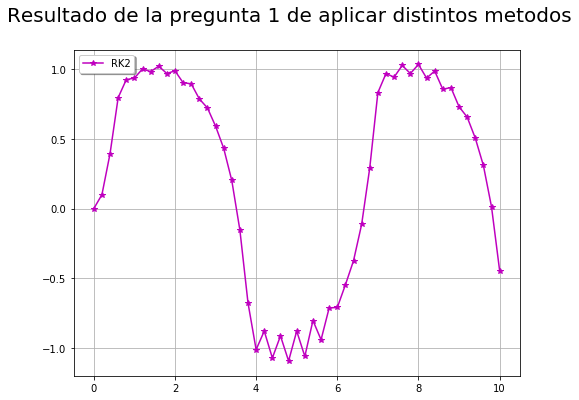

In [17]:
print("//////////////////////// Ejercicio ejemplo del libro ///////////////////")
# Problema a resolver 
# dx/dt = f(x,t)  DE t = 0 a t = 10. 
Pasos = 50
def diff1(t,x):
    return np.float64(-x**3+ np.sin(t))

# la funcion "y" analitica es:
########################### PENDIENTE VER CUAL ES LA SOLUCION REAL 
def funcion_resuelta(t):
    return np.float64((2*t)**(-1/2) - np.cos(t) )


# creamos el lugar donde graficaremos
# fig es la figura y axes son los ejes (son elementos de cada figura)
fig, axes = plt.subplots(nrows=1,ncols=1 , figsize = (8,6)) 

############### graficamos el analitico
# t = np.linspace(0.1,10,100)
#axes.plot(t,funcion_resuelta(t),'b',label="Analitico")

################# resolvemos el problema con el metodo de euler
solucion_euler = euler(f=diff1,t0=0,x0=0,limsup=10,n=Pasos)
#axes.plot(solucion_euler[0],solucion_euler[1],'r-*',label="Euler")

############ resolvemos el problema con el metodo de RK2
solucion_RK2 = RK2(f=diff1,t0=0,x0=0,limsup=10,n=Pasos)
axes.plot(solucion_RK2[0],solucion_RK2[1],'m-*',label="RK2")

################ resolvemos el problema con el metodo de RK4
solucion_RK4 = RK4(f=diff1,t0=0,x0=0,limsup=10,n=Pasos+100)
#axes.plot(solucion_RK4[0],solucion_RK4[1],'k-*',label="RK4")



# añadidos de imagen
axes.grid(True)
axes.legend( loc='upper left', shadow=True) 
fig.suptitle('Resultado de la pregunta 1 de aplicar distintos metodos', fontsize=20)

plt.show()
